In [56]:
import numpy as np
import pandas as pd
import pickle
from gurobipy import *
from Data import Data
from Solver import Solver
from InventorySimulator import InventorySimulator
from Simulator import Simulator
from X_finder import X_finder
import matplotlib.pyplot as plt
import seaborn as sns
import timeit

In [57]:
df = pd.read_csv('./FCT_all.csv')

In [58]:
df

,i,j,lb,ub,NC,RFr,RSr,gap
0,1,1,43.0,46.177541,1.5,0.25,0.2,0.0739
1,1,2,47.0,49.279125,1.5,0.25,0.2,0.0485
2,1,3,47.0,48.562851,1.5,0.25,0.2,0.0333
3,1,4,62.0,64.316194,1.5,0.25,0.2,0.0374
4,1,5,39.0,41.223619,1.5,0.25,0.2,0.0570
...,...,...,...,...,...,...,...,...
475,48,6,58.0,59.420826,2.1,1.00,1.0,0.0245
476,48,7,55.0,56.778694,2.1,1.00,1.0,0.0323
477,48,8,44.0,46.309416,2.1,1.00,1.0,0.0525
478,48,9,59.0,62.166700,2.1,1.00,1.0,0.0537


In [59]:
gap = np.array(list(df['gap']))
print('gap Mean = {}'.format(gap.mean()))
print('gap Median = {}'.format(np.median(gap)))
print('gap Min = {}'.format(gap.min()))
print('gap Max = {}'.format(gap.max()))

gap Mean = 0.05418791666666666
gap Median = 0.0518
gap Min = 0.0014
gap Max = 0.1263


In [60]:
df.groupby(['NC'])['gap'].mean()

NC
1.5    0.058206
1.8    0.054786
2.1    0.049571
Name: gap, dtype: float64

In [61]:
df.groupby(['RFr'])['gap'].mean()

RFr
0.25    0.037953
0.50    0.054787
0.75    0.060137
1.00    0.063874
Name: gap, dtype: float64

In [62]:
df.groupby(['RSr'])['gap'].mean()

RSr
0.2    0.052091
0.5    0.069987
0.7    0.055752
1.0    0.038922
Name: gap, dtype: float64

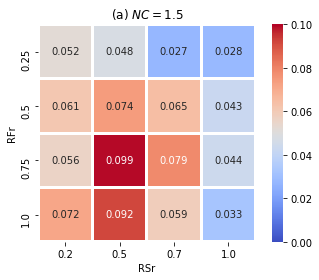

In [118]:
ddf = df[df['NC']==1.5]

a = ddf.pivot_table(index='RFr', columns='RSr', values='gap', aggfunc=np.mean)

ax = sns.heatmap(a, vmin=0, vmax=.1, annot=True, linewidths=2, square=True, cmap="coolwarm")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('(a) $NC = 1.5$')

plt.savefig('nc15.png', dpi=300)
plt.show()

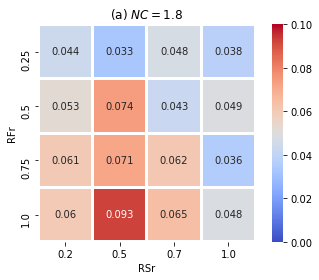

In [119]:
ddf = df[df['NC']==1.8]

a = ddf.pivot_table(index='RFr', columns='RSr', values='gap', aggfunc=np.mean)

ax = sns.heatmap(a, vmin=0, vmax=.1, annot=True, linewidths=2, square=True, cmap="coolwarm")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('(a) $NC = 1.8$')

plt.savefig('nc18.png', dpi=300)
plt.show()

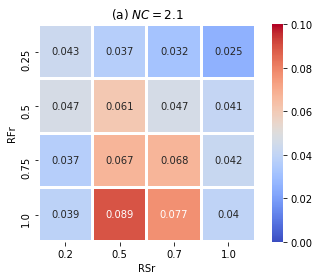

In [142]:
ddf = df[df['NC']==2.1]

a = ddf.pivot_table(index='RFr', columns='RSr', values='gap', aggfunc=np.mean)

ax = sns.heatmap(a, vmin=0, vmax=.1, annot=True, linewidths=2, square=True, cmap="coolwarm")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('(a) $NC = 2.1$')

plt.savefig('nc21.png', dpi=300)
plt.show()

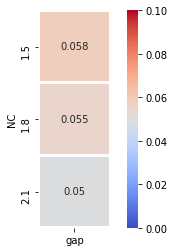

In [115]:
a = df.pivot_table(index='NC', columns=None, values='gap', aggfunc=np.mean)

ax = sns.heatmap(a, vmin=0, vmax=.1, annot=True, linewidths=2, square=True, cmap="coolwarm")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.savefig('test.png', dpi=300)
plt.show()